In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


# CREDIT SCORING
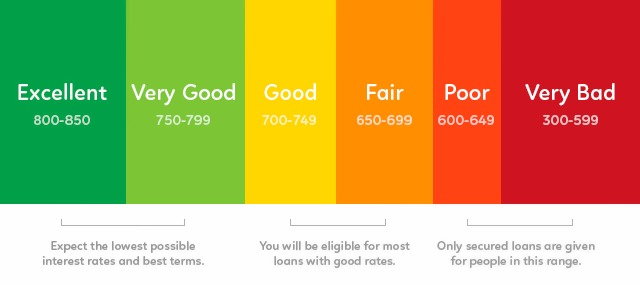

## Variables

**Usia** : 21 s/d 100
 - 1 : >64
 - 2 : 21 - 64

**Econ**  
 - 5 : econ >= 200000
 - 4 : 1500000 <=  econ < 1999999
 - 3 : 1000000 <= econ < 1499999
 - 2 : 500000 <=  econ < 999999
 - 1 : 10000 <=  econ  < 499999
 - 0 : econ <= 10000
 
**Pekerjaan** 
 - 1 : Wirausaha/ Pedagang/ Pekerja Lepas
 - 2 : Buruh/Guru/Dosen

**Peminjaman ke-** 
 - 1 : 1 
 - 2 : 2- 3 
 - 3 : > 3
 
**Hari telat bayar** 
 - 0 : tidak pernah 
 - 1 : < 1 minggu 
 - 2 : 2 - 4 minggu 
 - 3 : > 4 minggu
 
**Pernah Donasi** 
 - 0 : tidak pernah 
 - 1 : 1 - 3
 - 2 : 3- 5
 - 3 : >= 6

## Open Datasets with Pandas 

In [117]:
with open("./Dummy Datasets FICO Scoring - V41 - Final.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

,usia,econ,pekerjaan,pinjaman ke,telat bayar,donasi,score

Each data point looks like this:

0,2.0,5.0,2.0,3.0,0.0,3.0,849.969



In [118]:
data  = pd.read_csv(r'./Dummy Datasets FICO Scoring - V41 - Final.csv', delimiter=',')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,usia,econ,pekerjaan,pinjaman ke,telat bayar,donasi,score
0,2.0,5.0,2.0,3.0,0.0,3.0,849.969
1,1.0,0.0,1.0,1.0,3.0,0.0,110.833
2,1.0,0.0,1.0,2.0,2.0,3.0,324.136
3,2.0,5.0,1.0,2.0,1.0,2.0,657.896
4,2.0,5.0,2.0,2.0,2.0,1.0,664.156


## Exploratory Data Analyis (EDA)

In [119]:
# column list
data.columns

Index(['usia', 'econ', 'pekerjaan', 'pinjaman ke', 'telat bayar', 'donasi',
       'score'],
      dtype='object')

In [120]:
# statistical description of the data
data.describe()

,usia,econ,pekerjaan,pinjaman ke,telat bayar,donasi,score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.563100,3.193400,1.340100,2.216000,1.853600,1.387600,523.919502
std,0.496027,1.923374,0.473766,0.751266,0.990083,1.020231,150.999150
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,110.833000
25%,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,407.136000
50%,2.000000,4.000000,1.000000,2.000000,2.000000,1.000000,544.578000
75%,2.000000,5.000000,2.000000,3.000000,3.000000,2.000000,642.906000
max,2.000000,5.000000,2.000000,3.000000,3.000000,3.000000,849.969000


In [121]:
# additional info about data: type, number of nulls, number of rows and others
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   usia         10000 non-null  float64
 1   econ         10000 non-null  float64
 2   pekerjaan    10000 non-null  float64
 3   pinjaman ke  10000 non-null  float64
 4   telat bayar  10000 non-null  float64
 5   donasi       10000 non-null  float64
 6   score        10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB


In [122]:
# the number of rows and columns in the data
print('Total Row:', data.shape[0])
print('Total Columns:', data.shape[1])
data.shape

Total Row: 10000
Total Columns: 7


(10000, 7)

## Data Cleaning

### -- *Check Missing Value*

In [123]:
# Check missing value
data.isnull().sum()

usia           0
econ           0
pekerjaan      0
pinjaman ke    0
telat bayar    0
donasi         0
score          0
dtype: int64

In [124]:
print("Null values : ", data.isnull().sum().sum())
print("Shape of data: ", data.shape)

Null values :  0
Shape of data:  (10000, 7)


### -- *Check Duplicate*

In [125]:
#Check duplicate data
print("Data duplicated: ", data.duplicated().sum())

Data duplicated:  8908


## Data Preprocessing

### -- *Spitting features and label*

In [126]:
features = data.drop(columns=['score'])
label = data[['score']]

print(features.shape)
print(label.shape)

features.columns, label.columns

(10000, 6)
(10000, 1)


(Index(['usia', 'econ', 'pekerjaan', 'pinjaman ke', 'telat bayar', 'donasi'], dtype='object'),
 Index(['score'], dtype='object'))

### -- *Check Data Type*

Menyesuaikan tipe data sesuai dengan metadata yang diberikan

- **Categorical** (usia, pekerjaan, pinjaman ke, telat bayar, donasi )
- **Numeric** (jumlah pinjaman, tenor, pemasukan, tanggungan)

In [127]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [129]:
col_cat_label = ['score']
label[col_cat_label] = label[col_cat_label].astype('int64')
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [130]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   usia         10000 non-null  float64
 1   econ         10000 non-null  float64
 2   pekerjaan    10000 non-null  float64
 3   pinjaman ke  10000 non-null  float64
 4   telat bayar  10000 non-null  float64
 5   donasi       10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [131]:
col_cat_features = ['usia' , 'econ' , 'pekerjaan' , 'pinjaman ke' , 'telat bayar' , 'donasi' ]

features[col_cat_features] = features[col_cat_features].astype('int64')
features[col_cat_features] = features[col_cat_features].astype('category')

In [132]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   usia         10000 non-null  category
 1   econ         10000 non-null  category
 2   pekerjaan    10000 non-null  category
 3   pinjaman ke  10000 non-null  category
 4   telat bayar  10000 non-null  category
 5   donasi       10000 non-null  category
dtypes: category(6)
memory usage: 59.7 KB


## Normalize Data

In [133]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(features)
#features = scaler.transform(features)

from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

col_features = ['usia' , 'econ' , 'pekerjaan' , 'pinjaman ke' , 'telat bayar' , 'donasi' ]

features[col_features] = mx.fit_transform(features[col_features])
features.head(5)

,usia,econ,pekerjaan,pinjaman ke,telat bayar,donasi
0,1.0,1.0,1.0,1.0,0.000000,1.000000
1,0.0,0.0,0.0,0.0,1.000000,0.000000
2,0.0,0.0,0.0,0.5,0.666667,1.000000
3,1.0,1.0,0.0,0.5,0.333333,0.666667
4,1.0,1.0,1.0,0.5,0.666667,0.333333


## Split Into Train and Test

In [134]:
X_train, X_validate, y_train, y_validate = train_test_split(
    features, label, test_size=0.3, shuffle=True)

In [135]:
print(X_train.shape)
print(y_train.shape)

(7000, 6)
(7000, 1)


In [136]:
print(X_validate.shape)
print(y_validate.shape)

(3000, 6)
(3000, 1)


In [137]:
X_train = np.array(X_train, dtype='float32')
X_validate = np.array(X_validate, dtype='float32')

y_train = np.array(y_train, dtype='float32')
y_validate = np.array(y_validate, dtype='float32')

In [138]:
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(units=1, input_shape=[6], activation='linear'),
    tf.keras.layers.Dense(10, activation="linear", input_shape=X_train[0].shape),
    tf.keras.layers.Dense(1),
    ])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
            loss = tf.keras.losses.MeanAbsoluteError(),
            metrics=['mae'])

In [139]:
mc = ModelCheckpoint('Credit Scoring - V4.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)

# Train the model
history = model.fit(X_train, 
                y_train, 
                epochs=100,
                callbacks = [mc],
                validation_data=(X_validate, y_validate))

Epoch 1/100
207/219 [===========================>..] - ETA: 0s - loss: 520.9844 - mae: 520.9844
Epoch 1: val_mae improved from inf to 514.47369, saving model to Credit Scoring - V4.h5
219/219 [==============================] - 2s 5ms/step - loss: 521.7532 - mae: 521.7532 - val_loss: 514.4737 - val_mae: 514.4737
Epoch 2/100
217/219 [============================>.] - ETA: 0s - loss: 510.8683 - mae: 510.8683
Epoch 2: val_mae improved from 514.47369 to 498.56293, saving model to Credit Scoring - V4.h5
219/219 [==============================] - 1s 3ms/step - loss: 510.9591 - mae: 510.9591 - val_loss: 498.5629 - val_mae: 498.5629
Epoch 3/100
204/219 [==========================>...] - ETA: 0s - loss: 490.3116 - mae: 490.3116
Epoch 3: val_mae improved from 498.56293 to 472.47443, saving model to Credit Scoring - V4.h5
219/219 [==============================] - 1s 3ms/step - loss: 489.7855 - mae: 489.7855 - val_loss: 472.4744 - val_mae: 472.4744
Epoch 4/100
213/219 [============================

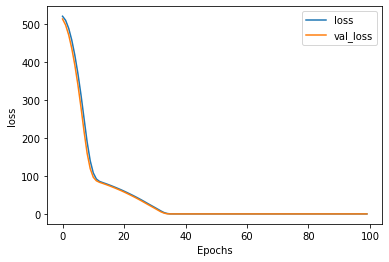

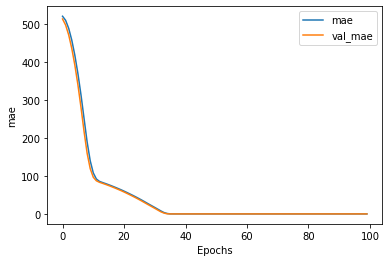

In [140]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "loss")
plot_graphs(history, "mae")

In [141]:
y_vld = pd.DataFrame(y_validate, columns = ['y_vld'])
y_pred = pd.DataFrame(model.predict(X_validate), columns = ['y_pred'])

print(type(y_vld))
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [142]:
y_pred.describe()

,y_pred
count,3000.000000
mean,520.894653
std,151.548187
min,125.435730
25%,402.180199
50%,538.126373
75%,642.771606
max,849.356018


In [143]:
print(y_validate)
print(y_pred)

[[460.]
 [373.]
 [452.]
 ...
 [339.]
 [482.]
 [449.]]
          y_pred
0     460.387848
1     373.202759
2     451.779022
3     708.826843
4     659.350464
...          ...
2995  647.060364
2996  279.144684
2997  339.361328
2998  481.689819
2999  449.007446

[3000 rows x 1 columns]


In [144]:
yv = y_vld.reset_index()
yvv = yv.reset_index()
print(yvv)

yp = y_pred.reset_index()
print(yp)

      level_0  index  y_vld
0           0      0  460.0
1           1      1  373.0
2           2      2  452.0
3           3      3  709.0
4           4      4  659.0
...       ...    ...    ...
2995     2995   2995  647.0
2996     2996   2996  279.0
2997     2997   2997  339.0
2998     2998   2998  482.0
2999     2999   2999  449.0

[3000 rows x 3 columns]
      index      y_pred
0         0  460.387848
1         1  373.202759
2         2  451.779022
3         3  708.826843
4         4  659.350464
...     ...         ...
2995   2995  647.060364
2996   2996  279.144684
2997   2997  339.361328
2998   2998  481.689819
2999   2999  449.007446

[3000 rows x 2 columns]


<AxesSubplot:xlabel='index', ylabel='y_pred'>

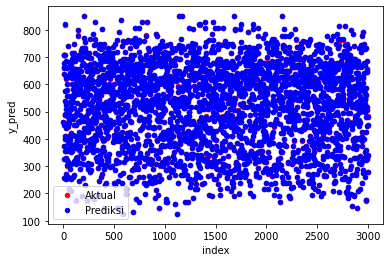

In [145]:
ax = yvv.plot(kind='scatter',x='level_0', y='y_vld',
                                           color='Red', label='Aktual')
yp.plot(kind='scatter', x='index', y='y_pred',
                                          color='Blue', label='Prediksi', ax=ax)

In [146]:
y_val = y_vld['y_vld'].to_list()
y_pred = y_pred['y_pred'].to_list()

In [147]:
list_y = pd.DataFrame(np.column_stack([y_vld, y_pred]), 
                               columns=['y_val', 'y_pred'])

<AxesSubplot:>

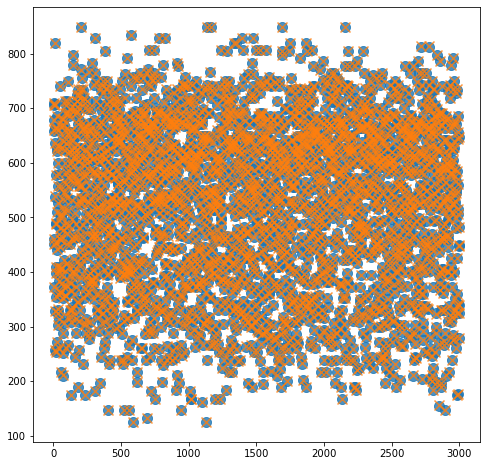

In [148]:
df1 = [2.5, 2.5, 2, 3, 4, 3.5]
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(ax=ax, x=df1)

index = list(range(1,3001))

# sns scatter, with regression fit turned off
sns.regplot(x=np.array(index), y=np.array(list_y['y_val']), scatter=True, fit_reg=False, marker='o',
            scatter_kws={"s": 100})  # the "s" key in `scatter_kws` modifies the size of the marker
# sns scatter, with regression fit turned off
sns.regplot(x=np.array(index), y=np.array(list_y['y_pred']), scatter=True, fit_reg=False, marker='x',
            scatter_kws={"s": 100})  # the "s" key in `scatter_kws` modifies the size of the marker

# Convert Model to TFLite

In [149]:
final_model = tf.keras.models.load_model('./Credit Scoring - V4.h5')

# Check its architecture
final_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                70        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [158]:
from keras.models import load_model
saved_model = load_model('Credit Scoring - V4.h5')
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = saved_model.evaluate(X_validate, y_validate, verbose=0)
print('Train Mae: %.3f, Valid Mae: %.3f' % (train_acc, valid_acc))

Train Mae: 0.250, Valid Mae: 0.246


In [151]:
fm = final_model.predict(features)
fm

array([[849.2937 ],
       [110.50361],
       [323.7763 ],
       ...,
       [714.9828 ],
       [806.76575],
       [389.6881 ]], dtype=float32)

In [152]:
CREDIT_SCORE_SAVED_MODEL = "Credit Scoring - V4"

In [153]:
tf.saved_model.save(final_model, CREDIT_SCORE_SAVED_MODEL)

INFO:tensorflow:Assets written to: Credit Scoring - V4\assets


INFO:tensorflow:Assets written to: Credit Scoring - V4\assets


In [154]:
loaded = tf.saved_model.load(CREDIT_SCORE_SAVED_MODEL)

In [155]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'dense_6_input': TensorSpec(shape=(None, 6), dtype=tf.float32, name='dense_6_input')})
{'dense_7': TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_7')}


In [156]:
converter = tf.lite.TFLiteConverter.from_saved_model(CREDIT_SCORE_SAVED_MODEL)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [157]:
tflite_model = converter.convert()
tflite_model_file = 'Credit Scoring - V4.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="Credit Scoring - V3.tflite")
# interpreter = tf.lite.Interpreter(model_path="regression.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'name': 'serving_default_flatten_6_input:0',
  'index': 0,
  'shape': array([1, 9]),
  'shape_signature': array([-1,  9]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 8,
  'shape': array([1, 1]),
  'shape_signature': array([-1,  1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
X_validate[1]

array([ 0.89289874,  0.04206796, -0.55670584,  0.92574293,  1.48349466,
       -0.70006492, -1.63661889,  0.14815577, -1.57889704])

In [ ]:
np_res_im = np.array(X_validate[0])
np_res_im = (np_res_im).astype('float32')
np_res_im

array([ 0.89289874,  0.1900383 , -0.94251674,  0.9257429 , -0.8619515 ,
       -0.7000649 ,  1.0545245 ,  0.14815576,  1.5801606 ], dtype=float32)

In [ ]:
print(input_details[0]['shape'])
print(np_res_im.shape)

[1 9]
(9,)


In [ ]:
if len(np_res_im.shape) == 1:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np_res_im.shape)

(1, 9)


In [ ]:
output_data.shape

(1, 1)

In [ ]:
predictions = new_model.predict(X_validate)

In [ ]:
y_validate

In [ ]:
print('prediction from model.h5: ' + str(predictions[0]))
print('prediction from model.tflite: ' + str(output_data))

prediction from model.h5: [790.95056]
prediction from model.tflite: [[790.95044]]


In [ ]:
print('Test Data:\n')
print('{"instances": [\n', np.array2string(X_validate[1], separator=', '), '\n]}')
print('Expected Result:', predictions[1])
print('Actual Labels:', y_validate[1])

In [ ]:
print('Test Data:\n')
print('{"instances": [\n', np.array2string(X_validate[2], separator=', '), '\n]}')
print('Expected Result:', predictions[2])
print('Actual Labels:', y_validate[2])